In [2]:
from session.REINFORCEsession import REINFORCESession
session = REINFORCESession('CustomHopper-source-v0', "outputs/reinforce_basic", verbose=1)
session.load_agent(None)
best_reward = session.train(10_000)

Successful creation of the session, first step is step=0.
Successful loading of the reinforce with baseline agent.
Episode: 1000 | Average return: 222.98 | Average episode length: 165.03
Episode: 2000 | Average return: 150.69 | Average episode length: 100.99
Episode: 3000 | Average return: 233.76 | Average episode length: 155.26
Episode: 4000 | Average return: 312.19 | Average episode length: 215.36
Episode: 5000 | Average return: 321.61 | Average episode length: 190.95
Episode: 6000 | Average return: 418.46 | Average episode length: 292.89
Episode: 7000 | Average return: 426.31 | Average episode length: 377.96
Episode: 8000 | Average return: 442.68 | Average episode length: 324.60
Episode: 9000 | Average return: 348.04 | Average episode length: 292.06
End of session step 0, Lasted 9521.03 s, Best reward: 654.56


In [2]:
from rolling_avg import rolling_avg

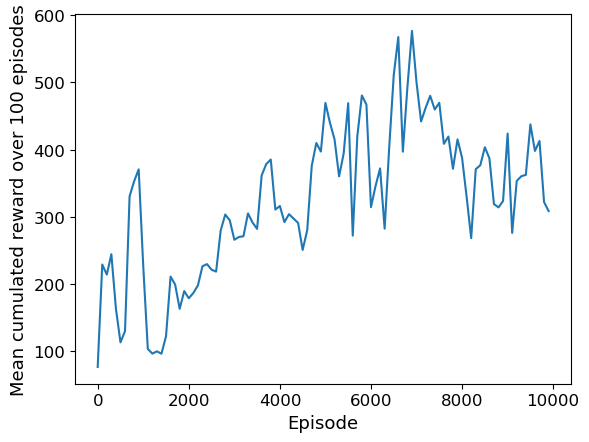

In [11]:
# plot result of session 1
import matplotlib.pyplot as plt
import json
fig, ax = plt.subplots(1,1)
dir = "outputs/reinforce_basic/step_0_train/"
with open(dir + 'rewards.json') as f:
    rewards = json.load(f)
n_episode = len(rewards)
n_avg = 100
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards)
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel(f"Mean cumulated reward over {n_avg} episodes", fontsize=13)
ax.tick_params(axis='both', labelsize=12)

In [ ]:
n_episodes = 15000
baselines = [0, 5, 20, 50]
for baseline in baselines:
    s = REINFORCESession('CustomHopper-source-v0', 'outputs/reinforce')
    s.load_agent(baseline=baseline)
    s.train(n_episodes)

In [ ]:
# plot result with several baselines.
fig, ax = plt.subplots(1,1)
n_avg = 500

for i in range(len(baselines)):
    dir = f"outputs/reinforce/step_{i}_train/"
    with open(dir + 'final_rewards.json') as f:
        rewards = json.load(f)
    n_episode = len(rewards)
    averaged_rewards = rolling_avg(rewards, n_avg)
    ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, label=str(baselines[i]), linewidth=1)
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel(f"Mean Reward (every 500 episodes)", fontsize=13)
ax.grid('')
#ax.set_yscale('log')
ax.set_ylim(1, 400)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)

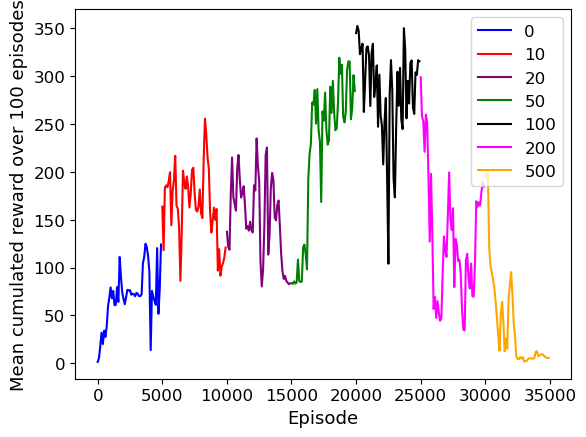

In [18]:
# plot result of test_moving_baseline
baselines = [0,10,20,50,100,200,500]
ep_per_baseline = 1500
fig, ax = plt.subplots(1,1)
for i in range(len(baselines)):
    dir = f"outputs/test_moving_baseline/step_{i+1}_train/"
    with open(dir + 'final_rewards.json') as f:
        rewards = json.load(f)
    n_episode = len(rewards)
    n_avg = 100
    averaged_rewards = rolling_avg(rewards, n_avg)
    ax.plot(range(n_episode*i, len(averaged_rewards)*n_avg + n_episode*i, n_avg), averaged_rewards, label=str(baselines[i]) if i<7 else None, color=colors[i%7])
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel(f"Mean cumulated reward over {n_avg} episodes", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


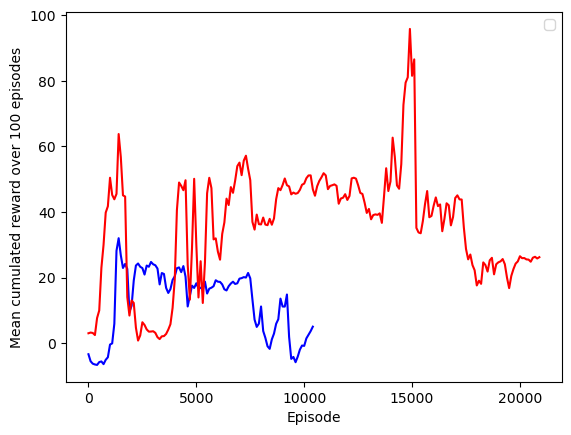

In [21]:
# plot result of increasing goal baseline 1 and 2
fig, ax = plt.subplots(1,1)
rewards = []
for i in range(14):
    dir = f"outputs/increasing_goal_baseline/step_{i+1}_train/"
    with open(dir + 'final_rewards.json') as f:
        rewards.extend(json.load(f))
n_episode = len(rewards)
n_avg = 100
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, color='blue')

rewards = []
for i in range(14):
    dir = f"outputs/increasing_goal_baseline2/step_{i}_train/"
    with open(dir + 'final_rewards.json') as f:
        rewards.extend(json.load(f))
n_episode = len(rewards)
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, color='red')
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel(f"Mean cumulated reward over {n_avg} episodes", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

Didn't keep the two last experiments as they are less important than other and we need space in the report.